# <center>PUBG Finih Placement Prediction</center>

<img src="/Datas/Pictures/pubg_background.jpg"
     alt="PUBG background" />

In [ ]:
# Import lib
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import numpy

from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prepro

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Setup complete !')

In [43]:
# Import data
def importData():
    # Import from file
    train = pd.read_csv("Datas/train_V2.csv")
    test = pd.read_csv("Datas/test_V2.csv")

    # Split train to have validate
    testSize = max(test.count())    
    train, validate = train_test_split(train, test_size=testSize)
    
    return train, validate, test

train, validate, test = importData()

## Examine data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512792 entries, 2906950 to 1214094
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoi

In [4]:
# Print the first 5 rows of the data
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2906950,9d4808db4728bb,82827abef55aeb,85702a2bc92fa6,0,1,90.00,1,0,0,43,...,0,1626.0,0,0.0,0,0,4542.00,6,1524,0.9149
4088556,735be30b6f3b52,9e16229f6c18d8,327cf13c7140d1,0,0,82.50,0,0,0,83,...,0,0.0,0,0.0,0,0,15.85,1,0,0.0000
934461,83396a3305c3bb,a3d16b6ed3ab86,92748990a38cb3,0,0,0.00,0,0,0,78,...,0,0.0,0,0.0,0,0,138.50,3,1500,0.1600
3346770,53174a6b36245f,a06c1381a7c4d8,8c95200c000821,0,0,292.10,0,0,0,11,...,0,0.0,0,0.0,0,0,120.80,2,1470,0.4184
1161381,1c022893a206bf,6651e07c0e50eb,1cfb8d4c54ebae,0,0,32.34,0,0,0,50,...,0,0.0,0,0.0,0,0,1592.00,7,0,0.5926


In [5]:
train.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307525,0.405485,0.300867,0.197357,0.227968,-0.289754,0.039405,0.318512,0.242844,...,0.197769,0.110711,0.011616,0.023180,0.006881,0.058855,0.290222,0.242829,0.024447,0.299362
boosts,0.307525,1.000000,0.522086,0.358738,0.335289,0.536248,-0.554853,0.008879,0.502618,0.405385,...,0.254213,0.329199,0.035488,0.108655,0.012864,0.087542,0.639758,0.406637,-0.007202,0.634045
damageDealt,0.405485,0.522086,1.000000,0.737986,0.613747,0.342881,-0.677705,0.050455,0.888567,0.703658,...,0.258030,0.140649,0.052879,0.037103,0.015735,0.080813,0.398387,0.352329,0.018181,0.440544
DBNOs,0.300867,0.358738,0.737986,1.000000,0.472651,0.265466,-0.555399,0.043403,0.710361,0.647162,...,0.301517,0.102500,0.036623,0.017285,0.069729,0.059875,0.284423,0.218928,0.011900,0.279916
headshotKills,0.197357,0.335289,0.613747,0.472651,1.000000,0.200986,-0.470760,0.024019,0.674689,0.513452,...,0.150994,0.076082,0.014413,0.029194,0.008856,0.038883,0.251348,0.217051,0.004882,0.277813
heals,0.227968,0.536248,0.342881,0.265466,0.200986,1.000000,-0.386430,-0.002036,0.312240,0.270684,...,0.237816,0.298491,0.025708,0.078695,0.036035,0.062827,0.430342,0.309865,-0.010535,0.428115
killPlace,-0.289754,-0.554853,-0.677705,-0.555399,-0.470760,-0.386430,1.000000,-0.023543,-0.731296,-0.810662,...,-0.270655,-0.236043,-0.057890,-0.089123,-0.038198,-0.073124,-0.590444,-0.490236,-0.002659,-0.719085
killPoints,0.039405,0.008879,0.050455,0.043403,0.024019,-0.002036,-0.023543,1.000000,0.036934,0.037508,...,0.012324,-0.029190,-0.005164,-0.004557,-0.039750,-0.009676,0.004951,-0.003938,0.983431,0.013195
kills,0.318512,0.502618,0.888567,0.710361,0.674689,0.312240,-0.731296,0.036934,1.000000,0.802765,...,0.254754,0.114770,0.064139,0.039392,0.018261,0.079190,0.375339,0.335585,0.007521,0.420301
killStreaks,0.242844,0.405385,0.703658,0.647162,0.513452,0.270684,-0.810662,0.037508,0.802765,1.000000,...,0.242439,0.098459,0.064510,0.034330,0.028267,0.064299,0.327708,0.274948,0.008940,0.377441


## Normalization

In [44]:
def normalization(data):
    le = prepro.LabelEncoder()
    le.fit(data["matchType"])
    data["matchType"] = le.transform(data["matchType"])
    le.fit(data["Id"])
    data["Id"] = le.transform(data["Id"])
    le.fit(data["groupId"])
    data["groupId"] = le.transform(data["groupId"])
    le.fit(data["matchId"])
    data["matchId"] = le.transform(data["matchId"])
    
    data = data.dropna()
    return data

train = normalization(train)
validate = normalization(validate)
test = normalization(test)

In [7]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2906950,1543485,780539,24903,0,1,90.00,1,0,0,43,...,0,1626.0,0,0.0,0,0,4542.00,6,1524,0.9149
4088556,1131909,944843,9383,0,0,82.50,0,0,0,83,...,0,0.0,0,0.0,0,0,15.85,1,0,0.0000
934461,1287391,978967,27364,0,0,0.00,0,0,0,78,...,0,0.0,0,0.0,0,0,138.50,3,1500,0.1600
3346770,815210,958600,26246,0,0,292.10,0,0,0,11,...,0,0.0,0,0.0,0,0,120.80,2,1470,0.4184
1161381,274341,612569,5383,0,0,32.34,0,0,0,50,...,0,0.0,0,0.0,0,0,1592.00,7,0,0.5926


## Plot the data

<AxesSubplot:title={'center':'PUBG killPlace impact on winPlacePerc'}, xlabel='killPlace', ylabel='winPlacePerc'>

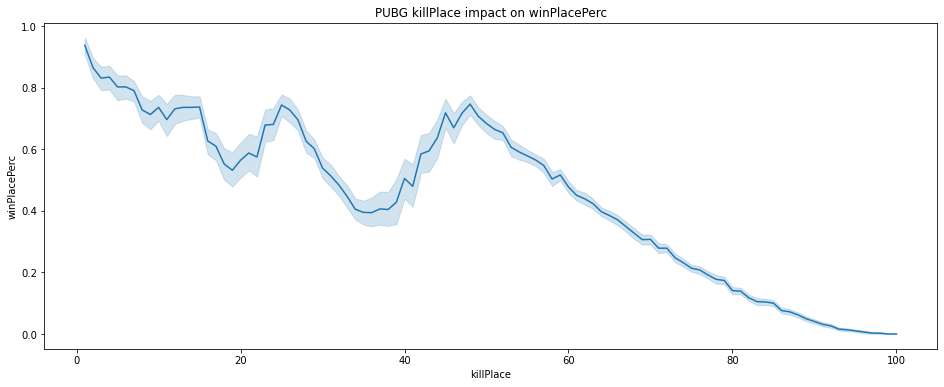

In [24]:
data_to_plot = train.head(10000)

plt.figure(figsize=(16,6))
plt.title('PUBG killPlace impact on winPlacePerc')
sns.lineplot(x=data_to_plot['killPlace'], y=data_to_plot['winPlacePerc'])

<AxesSubplot:title={'center':'data in link with KillPlace column'}, xlabel='kills', ylabel='killPlace'>

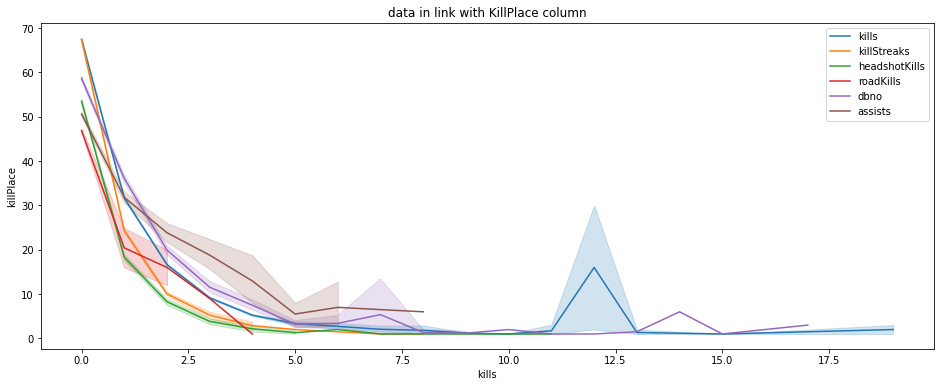

In [9]:
# Attention la valeur de killPlace est un classement donc la valeur 1 est la meilleure place et 100 la pire

plt.figure(figsize=(16,6))

plt.title("data in link with KillPlace column")

sns.lineplot(x=data_to_plot['kills'] , y=data_to_plot['killPlace'], label="kills")
sns.lineplot(x=data_to_plot['killStreaks'] , y=data_to_plot['killPlace'], label="killStreaks")
sns.lineplot(x=data_to_plot['headshotKills'] , y=data_to_plot['killPlace'], label="headshotKills")
sns.lineplot(x=data_to_plot['roadKills'] , y=data_to_plot['killPlace'], label="roadKills")
sns.lineplot(x=data_to_plot['DBNOs'] , y=data_to_plot['killPlace'], label="dbno")
sns.lineplot(x=data_to_plot['assists'] , y=data_to_plot['killPlace'], label="assists")

# damageDealt ? correspond un peu mais au début pas vraiment

## Removing columns

In [45]:
# Drop columns link to killPlace
columnsLinkToKillPlace = ["kills", "killStreaks", "headshotKills", "roadKills", "DBNOs", "assists"]

train = train.drop(columns=columnsLinkToKillPlace).copy()
validate = validate.drop(columns=columnsLinkToKillPlace).copy()
test = test.drop(columns=columnsLinkToKillPlace).copy()

# Regroup distance
train["distance"] = train["rideDistance"] + train["swimDistance"] + train["walkDistance"]
train = train.drop(columns=["rideDistance", "swimDistance", "walkDistance"])

validate["distance"] = validate["rideDistance"] + validate["swimDistance"] + validate["walkDistance"]
validate = validate.drop(columns=["rideDistance", "swimDistance", "walkDistance"])

test["distance"] = test["rideDistance"] + test["swimDistance"] + test["walkDistance"]
test = test.drop(columns=["rideDistance", "swimDistance", "walkDistance"])

In [46]:
# Temporairement
train = train.drop(columns=["rankPoints", "killPoints", "winPoints"])
test = test.drop(columns=["rankPoints", "killPoints", "winPoints"])
validate = validate.drop(columns=["rankPoints", "killPoints", "winPoints"])

## Basic data exploration

In [12]:
train.describe()

,Id,groupId,matchId,boosts,damageDealt,heals,killPlace,longestKill,matchDuration,matchType,maxPlace,numGroups,revives,teamKills,vehicleDestroys,weaponsAcquired,winPlacePerc,distance
count,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06
mean,1.256395e+06,7.643301e+05,2.397164e+04,1.105950e+00,1.306983e+02,1.370468e+00,4.759999e+01,2.300689e+01,1.579435e+03,1.082826e+01,4.450027e+01,4.300354e+01,1.648605e-01,2.380341e-02,7.903960e-03,3.659883e+00,4.728305e-01,1.764958e+03
std,7.253805e+05,4.414046e+05,1.384901e+04,1.714934e+00,1.706374e+02,2.678841e+00,2.746264e+01,5.099268e+01,2.587625e+02,5.327696e+00,2.382008e+01,2.328138e+01,4.725172e-01,1.674498e-01,9.249991e-02,2.455213e+00,3.074539e-01,2.184046e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.330000e+02,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.281975e+05,3.820505e+05,1.197700e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,1.367000e+03,3.000000e+00,2.800000e+01,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e-01,1.580000e+02
50%,1.256395e+06,7.644500e+05,2.397500e+04,0.000000e+00,8.427000e+01,0.000000e+00,4.700000e+01,0.000000e+00,1.438000e+03,1.400000e+01,3.000000e+01,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,4.583000e-01,7.879000e+02
75%,1.884592e+06,1.146640e+06,3.596500e+04,2.000000e+00,1.860000e+02,2.000000e+00,7.100000e+01,2.133000e+01,1.851000e+03,1.500000e+01,4.900000e+01,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,7.407000e-01,2.729000e+03
max,2.512791e+06,1.529088e+06,4.796400e+04,2.800000e+01,6.375000e+03,6.100000e+01,1.010000e+02,1.094000e+03,2.237000e+03,1.500000e+01,1.000000e+02,1.000000e+02,3.900000e+01,1.200000e+01,5.000000e+00,2.360000e+02,1.000000e+00,4.127010e+04


In [47]:
train_y = train.winPlacePerc
train_X = train.drop(columns=["winPlacePerc"])

validate_X = validate.drop(columns=["winPlacePerc"])
validate_y = validate["winPlacePerc"]

# Decision tree Model

In [29]:
# Define model
dtr_model = DecisionTreeRegressor(random_state=1)

# Fit model
dtr_model.fit(train_X, train_y)

# Predict
dtr_predict_validate = dtr_model.predict(validate_X)

dtr_predict_validate.head()

### Model evaluation

Une erreur est la différence entre la valeur voulu et la prédiction.

<strong>MAE</strong> (Mean Absolute Error) est la moyenne des valeurs absoluts des erreurs.

In [31]:
# MAE
mean_absolute_error(validate_y, predicted_validate)

0.08794389540129034

In [37]:
def get_mae(train_X, train_y, validate_X, validate_y, max_leaf_nodes):
    # Define
    dtr_model = DecisionTreeRegressor(max_leaf_nodes=x, random_state=1)
    
    # Fit
    dtr_model.fit(train_X, train_y)
    
    # Predict
    validate_predict = dtr_model.predict(validate_X)
    
    # MAE
    mae = mean_absolute_error(validate_y, validate_predict)
    return mae

for max_leaf_nodes in [5, 50, 500, 5000, 10000, 20000, 40000, 100000]:
    mae = get_mae(train_X, train_y, validate_X, validate_y, max_leaf_nodes)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0.115666
Max leaf nodes: 50  		 Mean Absolute Error:  0.084085
Max leaf nodes: 500  		 Mean Absolute Error:  0.071423
Max leaf nodes: 5000  		 Mean Absolute Error:  0.066287
Max leaf nodes: 10000  		 Mean Absolute Error:  0.066147
Max leaf nodes: 20000  		 Mean Absolute Error:  0.066663
Max leaf nodes: 40000  		 Mean Absolute Error:  0.068113
Max leaf nodes: 100000  		 Mean Absolute Error:  0.071893


In [ ]:
dtr_model.score(validate_X, validate_y)

# Random Forests

In [51]:
# Define
rf_model = RandomForestRegressor(random_state=1)

# Fit TODO 
rf_model.fit(train_X, train_y)

# Predict
#rf_predict_validate = rf_model.predict(validate_X)
#rf_predict_validate.head()

RandomForestRegressor(random_state=1)

In [ ]:
# MAE
mean_absolute_error(validate_y, rf_predict_validate)

In [17]:
#TODO calculer le biais https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html

In [50]:
# TODO votting classificateur